/tmp/ipykernel_13227/1024827150.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(means[:,np.newaxis], annot=True, cmap=cmap, cbar=False,yticklabels=True, ax=axs[0], vmin=vals.min(), vmax=vals.max())


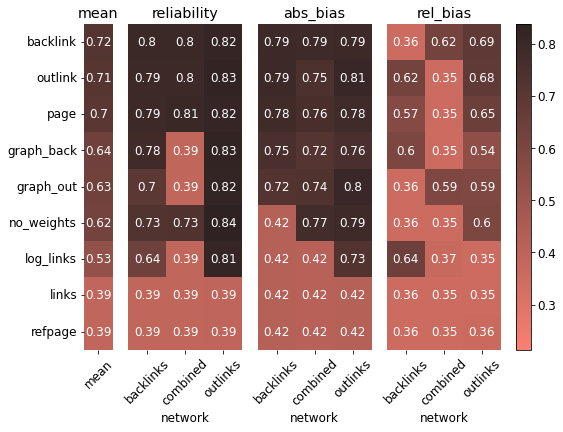

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

res = pd.read_csv('../results/gnn_weight_experiment_results.csv')

vals = res[['val_f1']]
fig, axs = plt.subplots(figsize=(8,6), ncols=5, gridspec_kw=dict(width_ratios=[1,4,4,4,0.5]))
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
axis = 1
plt.rcParams['font.size'] = '12'

means = res.groupby('weight_scheme').mean()['val_f1']
label_list = ['tb_ratio', 'so_ratio','tp_ratio',  'e_tb_ratio', 'e_so_ratio', 'none', 'log_links', 'links', 'unique_pages']
means = means.reindex(index=label_list)
tick_list = ['backlink', 'outlink','page',  'graph_back', 'graph_out', 'no_weights', 'log_links', 'links', 'refpage']
sns.heatmap(means[:,np.newaxis], annot=True, cmap=cmap, cbar=False,yticklabels=True, ax=axs[0], vmin=vals.min(), vmax=vals.max())
axs[0].set_xticklabels(['mean'], rotation=45)
axs[0].set_title('mean')
axs[0].set_yticklabels(tick_list,rotation=0)

for task in ['reliability','abs_bias', 'rel_bias']:
    task_df = res[res['task'] == task]
    f1s = task_df.pivot_table('val_f1', ['weight_scheme'], 'network')
    f1s = f1s.reindex(index=label_list)
    show_ticks = axis == 0
    sns.heatmap(f1s, annot=True, cmap=cmap, cbar=False,yticklabels=show_ticks, ax=axs[axis], vmin=vals.min(), vmax=vals.max())
    axs[axis].set_title(task)
    axs[axis].set_xticklabels(['backlinks', 'combined', 'outlinks'], rotation=45)
    if not show_ticks:
        axs[axis].set_ylabel('')
    axis += 1

fig.colorbar(axs[3].collections[0], cax=axs[4])
plt.savefig('../results/fig/heatmap_results.png', dpi=300, bbox_inches='tight')

In [17]:
means=res.groupby(['weight_scheme', 'network']).mean()['val_f1'].to_frame()
means = means.pivot_table('val_f1', ['weight_scheme'], 'network')#reset_index(level=1)
means = means.reindex(index=['tb_ratio', 'so_ratio','tp_ratio',  'e_tb_ratio', 'e_so_ratio', 'none', 'log_links', 'links', 'unique_pages'])

means

network,backlinks,combined,outlinks
weight_scheme,,,
tb_ratio,0.648728,0.736254,0.765093
so_ratio,0.736217,0.631690,0.773593
tp_ratio,0.716725,0.639982,0.751024
e_tb_ratio,0.710941,0.487852,0.708910
e_so_ratio,0.591960,0.572863,0.739027
none,0.502586,0.620590,0.741532
log_links,0.568230,0.392475,0.632448
links,0.389138,0.388117,0.389339
unique_pages,0.389138,0.388117,0.391624


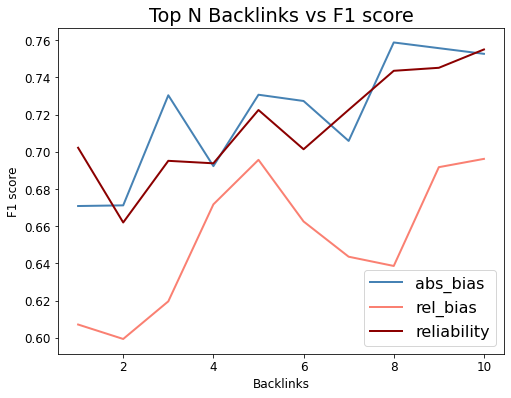

In [18]:
topn_tasks = pd.read_csv('../results/top_n_experiment_results.csv')
topn_tasks['top_n'] = topn_tasks['network'].apply(lambda name: int(name.split('_')[1]))

fig, ax = plt.subplots(figsize=(8,6))
topn_tasks = topn_tasks[topn_tasks['weight_scheme']=='none']
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
plt.rcParams['font.size'] = '16'

colors=['steelblue','salmon','darkred','turquoise','salmon', 'lightgreen']
i = 0
for label, df in topn_tasks.groupby(['task']):
    df[['val_f1','top_n']].plot(x='top_n',y='val_f1',ax=ax, label=label,c=colors[i],linewidth=2,fontsize=12)
    i+=1
plt.legend(loc='lower right')
plt.title('Top N Backlinks vs F1 score')
plt.xlabel('Backlinks')
plt.ylabel('F1 score')
plt.savefig('../results/fig/backlinks_vs_f1.png', dpi=300, bbox_inches='tight')